### installing libraries

In [33]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image 
import pytesseract
import imutils

Image conversion

In [34]:
img=cv2.imread("numberplates/Cars1.png")

# now convert image into gray scaling
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imwrite("numberplates/grayCar.png",gray)

True

Now apply filterilozarion,edge detection and conversion B&W image

In [35]:
# first use a kernal
filter=cv2.bilateralFilter(gray,11,17,17)
cv2.imwrite("numberplates/filterCar.png",filter) # save filter image

# get edged image we have to use the canny function from the cv2
edged=cv2.Canny(filter,30,200)
cv2.imwrite("numberplates/edgedCar.png",edged) #save the edgedcar image

True

Find contours

In [36]:
# we have to find rectangle bounding box containing numberplate
# basically we want a rectangular contours 
cnts=cv2.findContours(edged,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# now usinf imutils we can grab contours fro image 
contours=imutils.grab_contours(cnts)
# now sort the grabbed contours 
sortedContours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [37]:
# lets see how contours looks
print(sortedContours)

[array([[[139, 127]],

       [[138, 128]],

       [[136, 128]],

       [[135, 129]],

       [[135, 136]],

       [[134, 137]],

       [[134, 138]],

       [[134, 137]],

       [[135, 136]],

       [[135, 130]],

       [[137, 128]],

       [[138, 128]],

       [[139, 127]],

       [[144, 127]],

       [[146, 129]],

       [[146, 147]],

       [[145, 148]],

       [[145, 150]],

       [[144, 151]],

       [[135, 151]],

       [[134, 150]],

       [[134, 149]],

       [[134, 151]],

       [[145, 151]],

       [[146, 152]],

       [[205, 152]],

       [[206, 151]],

       [[207, 152]],

       [[256, 152]],

       [[257, 151]],

       [[257, 150]],

       [[258, 149]],

       [[258, 129]],

       [[257, 128]],

       [[257, 127]],

       [[147, 127]],

       [[146, 128]],

       [[145, 128]],

       [[144, 127]]], dtype=int32), array([[[146, 128]],

       [[147, 127]],

       [[256, 127]],

       [[258, 129]],

       [[258, 149]],

       [[257, 150

find our contours that will be 4 side bounding box 

In [38]:
l=None

for i in sortedContours:
    # check that a countter is rectangle or polygon if it is we can extract it diorectly
    approx=cv2.approxPolyDP(i,10,True)
    if len(approx)==4 :
        l=approx
        # print(l)
        if (abs(l[1][0][0]-l[0][0][0])>abs(l[0][0][1]-l[2][0][1])):
            break

# now we have our needed polygon image and lets see its configuration 
print(l)

[[[146 128]]

 [[256 127]]

 [[258 149]]

 [[147 152]]]


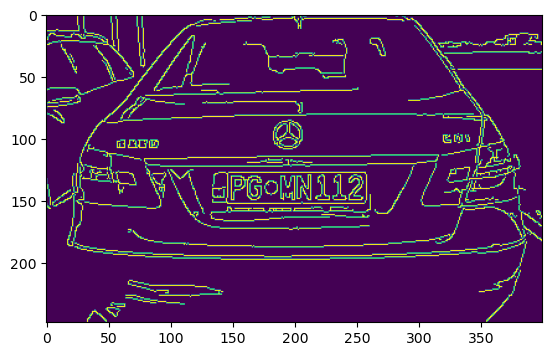

In [39]:
plt.imshow(edged)

Now lets extract that part of image and we can able to play with it and also can extract the data from it 

In [40]:
# created a mask 
mask=np.zeros(gray.shape,np.uint8)

# apply bounding box on image 
plate=cv2.drawContours(mask,[l],0,255,-1)

# extract numberplate
plate=cv2.bitwise_and(img,img,mask=mask)

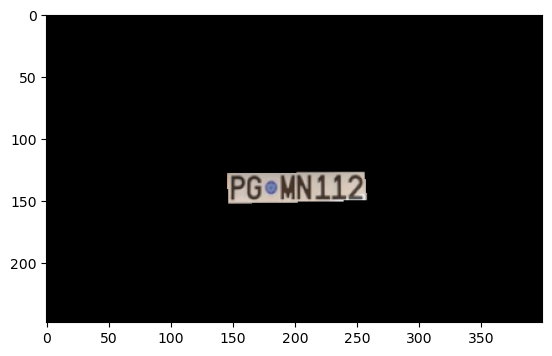

In [41]:
# lets save the exported plate and also display
plt.imshow(plate)

### Now we have to find the characters from image 

In [42]:
# lets grab the image 
x,y,w,h=cv2.boundingRect(l)
region_of_interest = plate[y:y+h, x:x+w]
cv2.imwrite("numberplates/plate.png",region_of_interest)

True

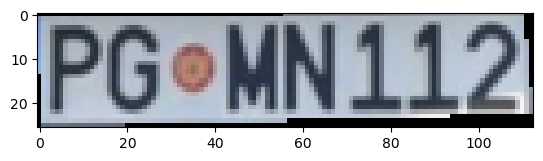

In [43]:
plt.imshow(Image.open("numberplates/plate.png"))

In [44]:
ocr_result=pytesseract.image_to_string(plate)

if ocr_result=="":
    plateImage=cv2.imread("numberplates/plate.png")
    grayPlate=cv2.cvtColor(plate,cv2.COLOR_BGR2GRAY)

    # save Image
    cv2.imwrite("numberplates/grayPlate.png",grayPlate)
    thres,bwplate=cv2.threshold(grayPlate,100,230,cv2.THRESH_BINARY)
    # print(bwplate)
    # save image 
    cv2.imwrite("numberplates/bwPlate.png",bwplate)
    plt.imshow(Image.open("numberplates/bwPlate.png"))
    ocr_result=pytesseract.image_to_string(bwplate)
    print(ocr_result)
else:
    print(ocr_result)

PGeMN112!



lets preprocess this image 

In [45]:
# # lets preprocess it 
# plateImage=cv2.imread("numberplates/plate.png")
# grayPlate=cv2.cvtColor(plate,cv2.COLOR_BGR2GRAY)

# # save Image
# cv2.imwrite("numberplates/grayPlate.png",grayPlate)

Convert grayscale image to B&W image 

In [46]:
# thres,bwplate=cv2.threshold(grayPlate,100,230,cv2.THRESH_BINARY)
# # print(bwplate)
# # save image 
# cv2.imwrite("numberplates/bwPlate.png",bwplate)
# plt.imshow(Image.open("numberplates/bwPlate.png"))

In [47]:
# now as we have the cropped numberplate our last task is to find the characters inside the numberplate
# now preprocess the image 
# ocr_result=pytesseract.image_to_string(bwplate)
# print(ocr_result)

In [48]:
# ocr_result